## Create code that processes model output into nice visualizations:

1) The files with daily cases, hospital, deaths counts across all population per districts with format output_workplaceBubblesSophie_ need to be averaged for daily trajectories
2) The files with daily cases, deaths, and in occupation by occupation (occ4) with format output_workplaceBubblesSophie_1_Economic_Status_Covid need to be averaged for daily trajectories
3) The files with daily demographics of cases and deaths by sex and gender

In [20]:
# generic packages
import os
from os.path import isfile, join
import glob
import subprocess
import re

#dataframe packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# plot packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns
sns.set(style="darkgrid")

#maps
import geopandas as gpd
import plotly.express as px
import json


In [21]:

input_path = "/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/model_output/a_daily_case_death_counts/"
output_path = "/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/model_output/a_daily_case_death_counts/plots/"


In [22]:
# decide which version I am creating graphics for 

# Define the folder path and file prefix
folder_path = input_path

file_prefix = 'output_workplaceBubblesSophie_'
id_prefix = 'bubbles_Norm'

file_prefix = 'output_workplaceBubblesLowBeta_'
id_prefix='bubbles_LowBeta'

file_prefix = 'output_workplaceBubblesHighBeta_'
id_prefix="bubbles_HighBeta"


### 1. Case counts version

## high beta 

In [23]:
file_prefix = 'output_workplaceBubblesHighBeta_'
id_prefix="bubbles_HighBeta"

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

In [24]:
columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
highB_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #highB_data[['metric_died_count', 'metric_new_cases_sympt']] = highB_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


#group the data by daily national cases (aggregating districts) but keeping runs independent
highB_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

#highB_data[['metric_died_count', 'metric_new_cases_sympt']] = highB_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
highB_data['metric_new_cases_sympt'] = pd.to_numeric(highB_data['metric_new_cases_sympt'])
#highB_data.set_index('time', inplace=True)
highB_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
highB_data.head()

,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [25]:
#group the data by daily national cases (aggregating districts) and runs for the meanmary stats 
highB_data2 = highB_data.groupby('time', as_index=False).mean()

highB_data2['metric_new_cases_sympt'] = pd.to_numeric(highB_data2['metric_new_cases_sympt'])
#r_data.set_index('time', inplace=True)
highB_data2.to_csv (output_path+f'{id_prefix}_agg2_case_counts.csv')
highB_data2.head()

# Find the row with the maximum values for the table 
max_peak = highB_data2[highB_data2['metric_new_cases_sympt']==highB_data2['metric_new_cases_sympt'].max()]
tot_died = highB_data2[highB_data2['metric_died_count']==highB_data2['metric_died_count'].max()]

# Print the row
max_peak.head()
tot_died.head()

,time,run,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
72,72,5.5,1429.7,0.0,0.0,0.0,0.0,0.1,173.1,358.6
73,73,5.5,1429.7,0.0,0.0,0.0,0.0,0.0,93.8,185.4
74,74,5.5,1429.7,0.0,0.0,0.0,0.0,0.0,49.9,91.6
75,75,5.5,1429.7,0.0,0.0,0.0,0.0,0.0,20.9,41.7
76,76,5.5,1429.7,0.0,0.0,0.0,0.0,0.0,8.1,20.8


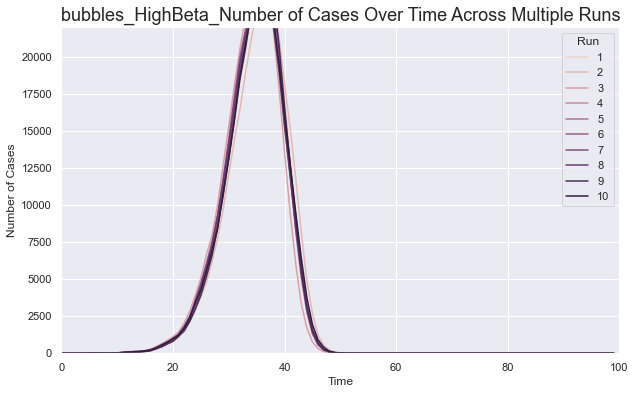

In [26]:
# Plotting the data
plt.figure(figsize=(10, 6))
# Get all unique categories in 'run' column
unique_runs = highB_data['run'].unique()
sns.lineplot(data=highB_data, x="time", y="metric_new_cases_sympt", hue="run", hue_order=unique_runs, err_style="band", legend="full") #, style=""


# Adding titles and labels
plt.title(f'{id_prefix}_Number of Cases Over Time Across Multiple Runs', size=18)
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.legend(title='Run') 
plt.xlim(0,100)
plt.ylim(0,22000)
plt.grid(True)

# export the plot 
plt.savefig(output_path+f'{id_prefix}_cases_over_time.png', dpi=300)


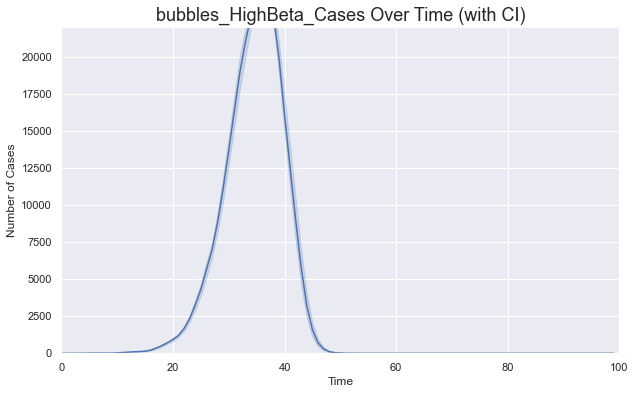

In [28]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=highB_data, x="time", y="metric_new_cases_sympt", ci='sd') #, style=""


# Adding titles and labels
plt.title(f'{id_prefix}_Cases Over Time (with CI)', size=18)
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xlim(0,100)
plt.ylim(0,22000)
plt.grid(True)

# export the plot 
plt.savefig(output_path+f'{id_prefix}_cases_over_time_err.png', dpi=300)


### Low beta

In [29]:
# so if I make the one above bubbles

file_prefix = 'output_workplaceBubblesLowBeta_'
id_prefix='bubbles_LowBeta'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
lowB_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #lowB_data[['metric_died_count', 'metric_new_cases_sympt']] = lowB_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


lowB_data.info()

lowB_data['metric_new_cases_sympt'] = pd.to_numeric(lowB_data['metric_new_cases_sympt'])
#lowB_data.set_index('time', inplace=True)
lowB_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
lowB_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [30]:
#group the data by daily national cases (aggregating districts) and runs for the meanmary stats 
lowB_data2 = lowB_data.groupby('time', as_index=False).mean()

lowB_data2['metric_new_cases_sympt'] = pd.to_numeric(lowB_data2['metric_new_cases_sympt'])
#r_data.set_index('time', inplace=True)
lowB_data2.to_csv (output_path+f'{id_prefix}_agg2_case_counts.csv')
lowB_data2.head()

# Find the row with the maximum values for the table 
max_peak = lowB_data2[lowB_data2['metric_new_cases_sympt']==lowB_data2['metric_new_cases_sympt'].max()]
tot_died = lowB_data2[lowB_data2['metric_died_count']==lowB_data2['metric_died_count'].max()]

# Print the row
max_peak.head()
#tot_died.head()

,time,run,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
99,99,5.5,131.1,266.7,62.9,4287.2,7138.2,12.8,8987.0,103724.2


## normal beta 

In [31]:

file_prefix = 'output_workplaceBubblesSophie_'
id_prefix = 'bubbles_Norm'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
normB_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #normB_data[['metric_died_count', 'metric_new_cases_sympt']] = normB_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


normB_data.info()

normB_data['metric_new_cases_sympt'] = pd.to_numeric(normB_data['metric_new_cases_sympt'])
#normB_data.set_index('time', inplace=True)
normB_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
normB_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [32]:
#group the data by daily national cases (aggregating districts) and runs for the meanmary stats 
normB_data2 = normB_data.groupby('time', as_index=False).mean()

normB_data2['metric_new_cases_sympt'] = pd.to_numeric(normB_data2['metric_new_cases_sympt'])
#r_data.set_index('time', inplace=True)
normB_data2.to_csv (output_path+f'{id_prefix}_agg2_case_counts.csv')
normB_data2.head()

# Find the row with the maximum values for the table 
max_peak = normB_data2[normB_data2['metric_new_cases_sympt']==normB_data2['metric_new_cases_sympt'].max()]
tot_died = normB_data2[normB_data2['metric_died_count']==normB_data2['metric_died_count'].max()]

# Print the row
max_peak.head()
tot_died.head()

,time,run,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
93,93,5.5,1439.5,0.0,0.0,0.0,0.0,0.2,9.6,31.5
94,94,5.5,1439.5,0.0,0.0,0.0,0.0,0.0,6.1,21.7
95,95,5.5,1439.5,0.0,0.0,0.0,0.0,0.0,3.7,15.6
96,96,5.5,1439.5,0.0,0.0,0.0,0.0,0.0,1.9,11.9
97,97,5.5,1439.5,0.0,0.0,0.0,0.0,0.0,1.6,10.0


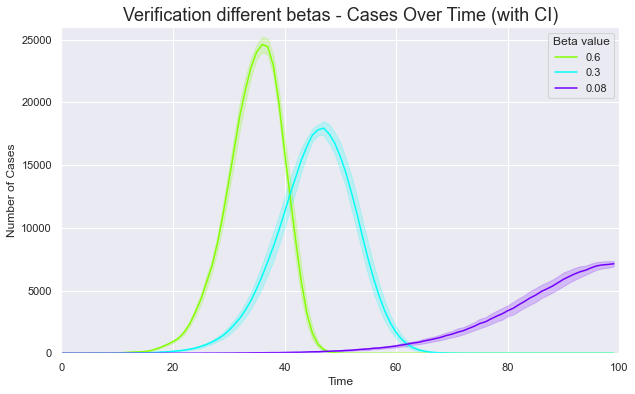

In [33]:
# Plotting the data
sns.set_palette(sns.color_palette('hsv',3))  # You can replace "husl" with another palette name like "pastel", "deep", etc.
plt.figure(figsize=(10, 6))

# line for high beta 
sns.lineplot(data=highB_data, x="time", y="metric_new_cases_sympt", ci='sd', label = '0.6') #, style=""
# # Then add another line for norm beta
sns.lineplot(data=normB_data, x="time", y="metric_new_cases_sympt", ci='sd', label = '0.3') #, style=""
# # Then add another line for low beta
sns.lineplot(data=lowB_data, x="time", y="metric_new_cases_sympt", ci='sd', label = '0.08') #, style=""



# Adding titles and labels
plt.title('Verification different betas - Cases Over Time (with CI)', size=18)
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xlim(0,100)
plt.ylim(0,26000)
plt.grid(True)
plt.legend(title='Beta value')

# export the plot 
plt.savefig(output_path+'Cases_over_time_diffBetas.png', dpi=300, facecolor="white")

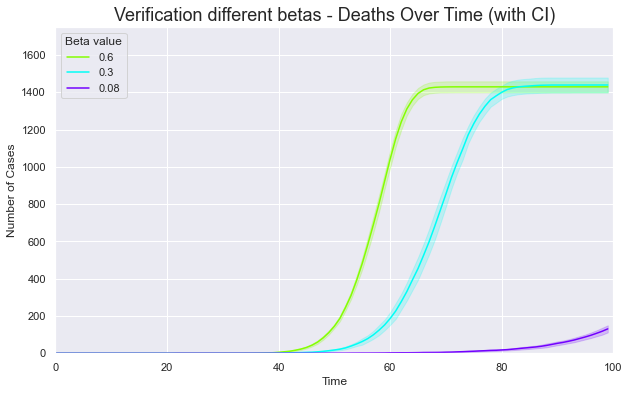

In [34]:
# Plotting the data
sns.set_palette(sns.color_palette('hsv',3))  # You can replace "husl" with another palette name like "pastel", "deep", etc.
plt.figure(figsize=(10, 6))

# line for high beta 
sns.lineplot(data=highB_data, x="time", y="metric_died_count", ci='sd', label = '0.6') #, style=""
# # Then add another line for norm beta
sns.lineplot(data=normB_data, x="time", y="metric_died_count", ci='sd', label = '0.3') #, style=""
# # Then add another line for low beta
sns.lineplot(data=lowB_data, x="time", y="metric_died_count", ci='sd', label = '0.08') #, style=""



# Adding titles and labels
plt.title('Verification different betas - Deaths Over Time (with CI)', size=18)
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xlim(0,100)
plt.ylim(0,1750)
plt.grid(True)
plt.legend(title='Beta value')

# export the plot 
plt.savefig(output_path+'Deaths_over_time_diffBetas.png', dpi=300, facecolor="white")

## Mobility scenarios overlaid 

### Lockdown

In [58]:
# so if I make the base bubblesNorm always 

file_prefix = 'output_BubblesLd_'
id_prefix = 'bubblesLd'


# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
l_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #l_data[['metric_died_count', 'metric_new_cases_sympt']] = l_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


l_data.info()

#l_data[['metric_died_count', 'metric_new_cases_sympt']] = l_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
l_data['metric_new_cases_sympt'] = pd.to_numeric(l_data['metric_new_cases_sympt'])
#l_data.set_index('time', inplace=True)
l_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
l_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [36]:
# so if I make the one above bubbles


file_prefix = 'output_BubblesLd_'
id_prefix = 'bubblesLdv2'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
l2_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #l2_data[['metric_died_count', 'metric_new_cases_sympt']] = l2_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


l2_data.info()

#l2_data[['metric_died_count', 'metric_new_cases_sympt']] = l2_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
l2_data['metric_new_cases_sympt'] = pd.to_numeric(l2_data['metric_new_cases_sympt'])
#l2_data.set_index('time', inplace=True)
l2_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
l2_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [37]:
## Scenario 1a

In [38]:



file_prefix = 'output_BubblesLd1a'
id_prefix = 'bubblesLd_1a'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
s_1a_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #s_1a_data[['metric_died_count', 'metric_new_cases_sympt']] = s_1a_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


s_1a_data.info()

#s_1a_data[['metric_died_count', 'metric_new_cases_sympt']] = s_1a_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
s_1a_data['metric_new_cases_sympt'] = pd.to_numeric(s_1a_data['metric_new_cases_sympt'])
#s_1a_data.set_index('time', inplace=True)
s_1a_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
s_1a_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [39]:
## scenario 1b 

In [40]:
file_prefix = 'output_BubblesLd1b'
id_prefix = 'bubblesLd_1b'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
s_1b_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #s_1b_data[['metric_died_count', 'metric_new_cases_sympt']] = s_1b_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


s_1b_data.info()

#s_1b_data[['metric_died_count', 'metric_new_cases_sympt']] = s_1b_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
s_1b_data['metric_new_cases_sympt'] = pd.to_numeric(s_1b_data['metric_new_cases_sympt'])
#s_1b_data.set_index('time', inplace=True)
s_1b_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
s_1b_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        900 non-null    int64
 1   time                       900 non-null    int64
 2   metric_died_count          900 non-null    int64
 3   metric_new_hospitalized    900 non-null    int64
 4   metric_new_critical        900 non-null    int64
 5   metric_new_cases_asympt    900 non-null    int64
 6   metric_new_cases_sympt     900 non-null    int64
 7   metric_new_deaths          900 non-null    int64
 8   metric_new_recovered       900 non-null    int64
 9   metric_currently_infected  900 non-null    int64
dtypes: int64(10)
memory usage: 70.4 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [41]:
## Scenario 2a

In [42]:
file_prefix = 'output_BubblesLd2a'
id_prefix = 'bubblesLd_2a'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
s_2a_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #s_2a_data[['metric_died_count', 'metric_new_cases_sympt']] = s_2a_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


s_2a_data.info()

#s_2a_data[['metric_died_count', 'metric_new_cases_sympt']] = s_2a_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
s_2a_data['metric_new_cases_sympt'] = pd.to_numeric(s_2a_data['metric_new_cases_sympt'])
#s_2a_data.set_index('time', inplace=True)
s_2a_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
s_2a_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [43]:
file_prefix = 'output_BubblesLd2b'
id_prefix = 'bubblesLd_2b'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
s_2b_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #s_2b_data[['metric_died_count', 'metric_new_cases_sympt']] = s_2b_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


s_2b_data.info()

#s_2b_data[['metric_died_count', 'metric_new_cases_sympt']] = s_2b_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
s_2b_data['metric_new_cases_sympt'] = pd.to_numeric(s_2b_data['metric_new_cases_sympt'])
#s_2b_data.set_index('time', inplace=True)
s_2b_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
s_2b_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [44]:
file_prefix = 'output_BubblesLd3a'
id_prefix = 'bubblesLd_3a'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
s_3a_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #s_3a_data[['metric_died_count', 'metric_new_cases_sympt']] = s_3a_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


s_3a_data.info()

#s_3a_data[['metric_died_count', 'metric_new_cases_sympt']] = s_3a_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
s_3a_data['metric_new_cases_sympt'] = pd.to_numeric(s_3a_data['metric_new_cases_sympt'])
#s_3a_data.set_index('time', inplace=True)
s_3a_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
s_3a_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


In [45]:
file_prefix = 'output_BubblesLd3b'
id_prefix = 'bubblesLd_3b'

# Use glob to find all files with the specified prefix
file_pattern = f"{folder_path}/{file_prefix}*.txt"
file_list = glob.glob(file_pattern)

# Initialize an empty list to store individual DataFrames
df_list = []

# Loop through the list of files and read each one into a DataFrame
for file in file_list:
    df = pd.read_csv(file, delimiter='\t')# Adjust delimiter as per your file format
    # Extract the run number from the filename
    run_number = os.path.basename(file).split('_')[-1].split('.')[0]
    df['run']=run_number
    df_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)
# Convert the 'run_number' column to numeric (int64)
final_df['run'] = pd.to_numeric(final_df['run'])
# Display the resulting DataFrame
nan_rows = final_df[final_df.isna().any(axis=1)]

columns= ['metric_died_count', 'metric_new_hospitalized',
       'metric_new_critical', 'metric_new_cases_asympt',
       'metric_new_cases_sympt', 'metric_new_deaths', 'metric_new_recovered',
       'metric_currently_infected']   

#group the data by daily national cases (aggregating districts) but keeping runs independent
s_3b_data = final_df.groupby(['run', 'time'], as_index=False).agg({'metric_died_count': 'sum', 'metric_new_hospitalized': 'sum', 
                                    'metric_new_critical': 'sum', 'metric_new_cases_asympt': 'sum',
                                    'metric_new_cases_sympt': 'sum', 'metric_new_deaths': 'sum', 
                                    'metric_new_recovered': 'sum', 'metric_currently_infected': 'sum'})

# #s_3b_data[['metric_died_count', 'metric_new_cases_sympt']] = s_3b_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')


s_3b_data.info()

#s_3b_data[['metric_died_count', 'metric_new_cases_sympt']] = s_3b_data[['metric_died_count', 'metric_new_cases_sympt']].apply(pd.to_numeric, errors='coerce')
s_3b_data['metric_new_cases_sympt'] = pd.to_numeric(s_3b_data['metric_new_cases_sympt'])
#s_3b_data.set_index('time', inplace=True)
s_3b_data.to_csv (output_path+f'{id_prefix}_agg_case_counts.csv')
s_3b_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   run                        1000 non-null   int64
 1   time                       1000 non-null   int64
 2   metric_died_count          1000 non-null   int64
 3   metric_new_hospitalized    1000 non-null   int64
 4   metric_new_critical        1000 non-null   int64
 5   metric_new_cases_asympt    1000 non-null   int64
 6   metric_new_cases_sympt     1000 non-null   int64
 7   metric_new_deaths          1000 non-null   int64
 8   metric_new_recovered       1000 non-null   int64
 9   metric_currently_infected  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
0,1,0,0,0,0,6,4,0,0,0
1,1,1,0,0,0,0,0,0,0,10
2,1,2,0,0,0,0,0,0,0,10
3,1,3,0,0,0,0,0,0,0,10
4,1,4,0,0,0,0,0,0,0,10


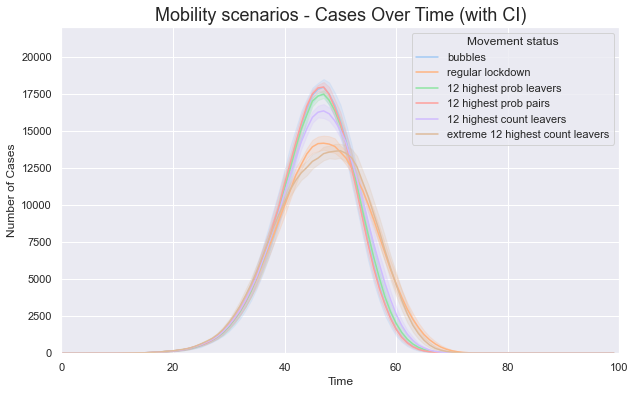

In [47]:
# Plotting the data
sns.set_palette(sns.color_palette('pastel',6))  # You can replace "husl" with another palette name like "pastel", "deep", etc.
# Define specific color names for each line
# colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']


plt.figure(figsize=(10, 6))
# sns.lineplot(data=l_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'lockdown bubbles') #, style=""
# # Then add another line for non-lockdown
sns.lineplot(data=normB_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'bubbles') #, style=""

# Add ld scenarios 
sns.lineplot(data=l_data, x="time", y="metric_new_cases_sympt",  label = 'regular lockdown') #, style=""
# sns.lineplot(data=l2_data, x="time", y="metric_new_cases_sympt", ci='sd', label = 'delayed lockdown') #, style=""
sns.lineplot(data=s_1a_data, x="time", y="metric_new_cases_sympt",  label = '12 highest prob leavers') #, style=""
# sns.lineplot(data=s_1b_data, x="time", y="metric_new_cases_sympt", ci='sd', label = '5 highest prob leavers') #, style=""
sns.lineplot(data=s_2a_data, x="time", y="metric_new_cases_sympt", label = '12 highest prob pairs') #, style=""
# sns.lineplot(data=s_2b_data, x="time", y="metric_new_cases_sympt", ci='sd', label = '5 highest prob pairs') #, style=""
sns.lineplot(data=s_3a_data, x="time", y="metric_new_cases_sympt",  label = '12 highest count leavers') #, style=""
sns.lineplot(data=s_3b_data, x="time", y="metric_new_cases_sympt",  label = 'extreme 12 highest count leavers') #, style=""



# Adding titles and labels
plt.title('Mobility scenarios - Cases Over Time (with CI)', size=18)
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xlim(0,100)
plt.ylim(0,22000)
plt.grid(True)
plt.legend(title='Movement status')

# export the plot 
plt.savefig(output_path+'Cases_over_time_movement_scenarios.png', dpi=300)

In [56]:

normB_data.head()

# Find the row with the maximum values for the table 
max_peak = normB_data[normB_data['metric_new_cases_sympt']==normB_data['metric_new_cases_sympt'].max()]
tot_died = normB_data[normB_data['metric_died_count']==normB_data['metric_died_count'].max()]

# Print the row
max_peak.head()
#tot_died.head()

,run,time,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
847,9,47,16,402,67,11180,18710,5,12599,217766


In [62]:
l_data.head()

# needs grouping by day 
l_data = l_data.groupby('time', as_index=False).mean()

# Find the row with the maximum values for the table 
max_peak = l_data[l_data['metric_new_cases_sympt']==l_data['metric_new_cases_sympt'].max()]
tot_died = l_data[l_data['metric_died_count']==l_data['metric_died_count'].max()]

# Print the row
max_peak.head()
tot_died.head()

,time,run,metric_died_count,metric_new_hospitalized,metric_new_critical,metric_new_cases_asympt,metric_new_cases_sympt,metric_new_deaths,metric_new_recovered,metric_currently_infected
97,97,5.5,1449.4,0.0,0.0,0.0,0.0,0.1,13.1,42.7
98,98,5.5,1449.4,0.0,0.0,0.0,0.0,0.0,10.4,29.5
99,99,5.5,1449.4,0.0,0.0,0.0,0.0,0.0,5.4,19.1
